In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

dates = pd.date_range(start='20230101', periods=1000)
values = np.random.randn(1000).cumsum()

data = pd.DataFrame({'Date':dates, 'Value':values})

data.loc[100:200, 'Value'] = np.nan
print(data.loc[100:200])

          Date  Value
100 2023-04-11    NaN
101 2023-04-12    NaN
102 2023-04-13    NaN
103 2023-04-14    NaN
104 2023-04-15    NaN
..         ...    ...
196 2023-07-16    NaN
197 2023-07-17    NaN
198 2023-07-18    NaN
199 2023-07-19    NaN
200 2023-07-20    NaN

[101 rows x 2 columns]


In [13]:
# 선형보간
from scipy.interpolate import CubicSpline
data['Value_filled'] = data['Value'].interpolate(method='linear')

# 스플라인보간
splinear = CubicSpline(data.index, data['Value_filled'])
data['Value_spline'] = splinear(data.index)

# 최근접이웃보간
data['Value_nearest'] = data['Value'].interpolate(method='nearest')
print(data.loc[100:200])

          Date  Value  Value_filled  Value_spline  Value_nearest
100 2023-04-11    NaN     -9.144683     -9.144683      -9.125172
101 2023-04-12    NaN     -9.164194     -9.164194      -9.125172
102 2023-04-13    NaN     -9.183705     -9.183705      -9.125172
103 2023-04-14    NaN     -9.203216     -9.203216      -9.125172
104 2023-04-15    NaN     -9.222727     -9.222727      -9.125172
..         ...    ...           ...           ...            ...
196 2023-07-16    NaN    -11.017753    -11.017753     -11.115309
197 2023-07-17    NaN    -11.037264    -11.037264     -11.115309
198 2023-07-18    NaN    -11.056775    -11.056775     -11.115309
199 2023-07-19    NaN    -11.076287    -11.076287     -11.115309
200 2023-07-20    NaN    -11.095798    -11.095798     -11.115309

[101 rows x 5 columns]


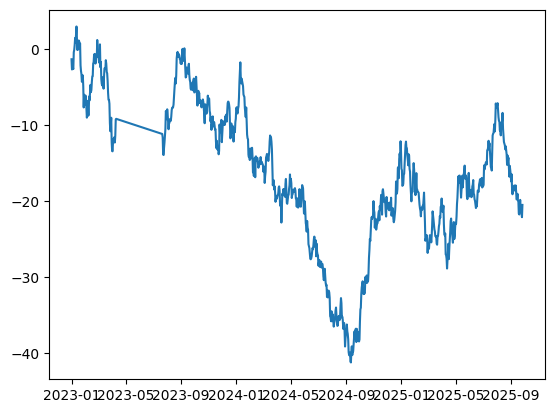

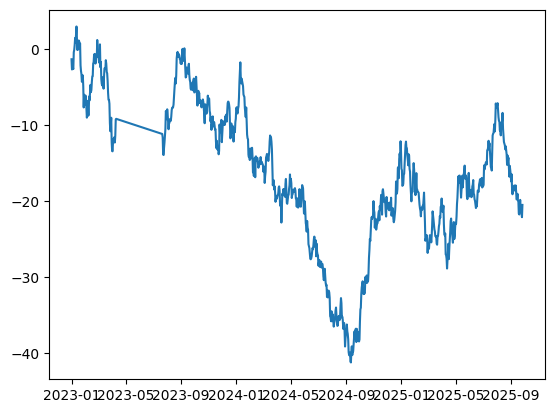

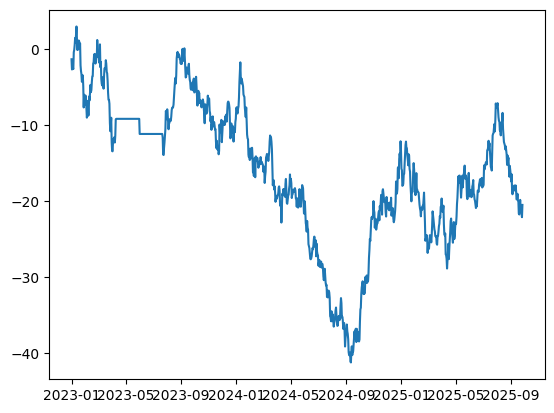

In [14]:
plt.plot(data['Date'], data['Value_filled'])
plt.show()
plt.plot(data['Date'], data['Value_spline'])
plt.show()
plt.plot(data['Date'], data['Value_nearest'])
plt.show()

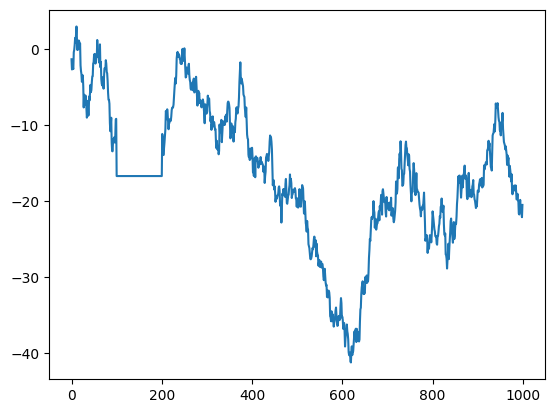

In [15]:
# 평균값 대체
data['Value_mean'] = data['Value'].fillna(data['Value'].mean())

plt.plot(data['Value_mean'])
plt.show()